# Julia

University of Waterloo Data Science Club  
February 25, 2020

(Follow along with these slides at https://wafy.me/jlworkshop.html)

## Objective

Better title: **Being Productive with Julia**

- Julia is a (fairly new) general purpose programming language which is particularly well-suited for *technical computing*
- Will not talk about too many specific details of the language (documentation is better for that)
  - limited syntax discussion; will cover some useful tricks
- Workshop more focused on: practical advice and as examples

Please **always feel free to ask questions**.

(Follow along with these slides at https://wafy.me/jlworkshop.html)

## Outline

1. Setting up basic tools
2. Solving a math problem
3. Some discussion on types and efficiency
4. Neat non-programming application: vector graphics
5. A simple data science/programming project

(Follow along with these slides at https://wafy.me/jlworkshop.html)

## Part 1: Installation and Tools

Download and install [Julia 1.3.1](https://julialang.org/downloads/) (recommended) from the official website. Windows, Mac, Linux binaries available, or compile it yourself. (I usually compile the latest `master` branch, but this is only recommended if you are risk-seeking.)

Open a terminal emulator or command prompt and run the `julia` executable. You should see this (version and shell may vary):

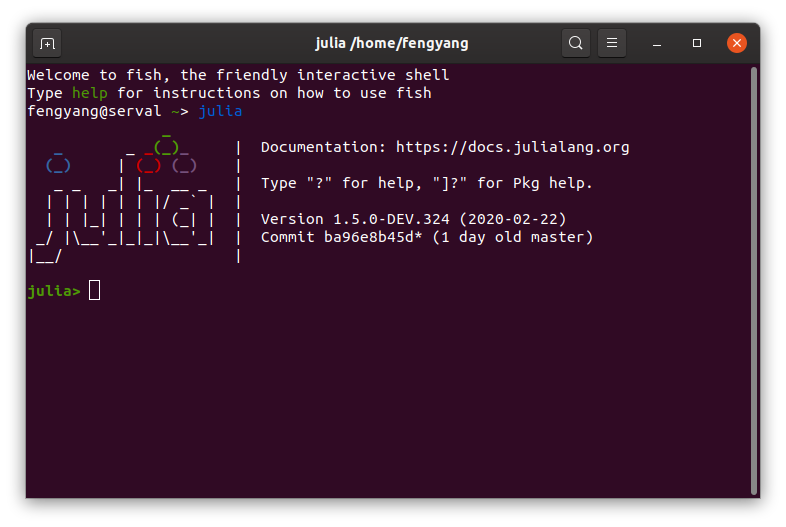

## Tools

- REPL: great for calculations, installing packages, and rapid iteration
- IJulia: great for visualizations, multimedia, and notebook-style iteration
- Text editors: for projects (more permanent code)
- IDEs: for big projects; a few options available, e.g. Juno https://junolab.org/

Personally: I use [`nvim`](https://neovim.io/) and [TabNine](https://tabnine.com/) for projects. I don’t use IDEs because they are not necessary for the size and scope of the projects I work on.

Today: We will use REPL and IJulia. REPL is immediately available upon downloading/installing Julia. We need to install `IJulia` using the package manager.

(If you must: You can also run Julia on https://repl.it/. The advantage is you don’t need to install anything. The disadvantage is that this REPL is quite bad compared to the normal Julia REPL. No promises all this workshop will work... Let me know if you need help with this.)

## Installing IJulia

- To use the package manager, type `]` at the REPL prompt. This activate the package manager REPL mode.
- Then type `add IJulia`. Hit enter/return.

Hopefully you see this:



## Running IJulia

- Now hit Backspace to exit the package manager REPL mode.
- Type `using IJulia`, then hit enter/return, to import the `IJulia` package.
- Type `notebook()`, then hit enter/return, to run a notebook.

If everything goes well, this should run a jupyter notebook server and you should see a browser window come up.

These slides are a Jupyter notebook. You can download it at https://wafy.me/jlworkshop.ipynb and open it through the Jupyter server running. (Optional; everything we will do can be done in REPL too, or typed by hand.)

## REPL vs. IJulia

- `notebook()` blocks your REPL session
- If you hit Ctrl-C, you can interrupt it, but this will shut down the Jupyter notebook server
- Up to you whether you want to use REPL for the rest of this workshop
- You can also open a new REPL window and try both

## Quick Tips for REPL

Most important:

- Up/Down: Cycle through history. You can also type some letters, then Up/Down to cycle through a filtered history.
- TAB: completion (for identifiers, special characters, etc.)

Useful:

- Ctrl-A: Go to start of line
- Ctrl-E: Go to end of line
- Ctrl-R: Reverse-i-search (if you want to find something in history)
- Ctrl-L: Clear screen (if you want to hide some noise)
- `\alpha<TAB>`: Type special characters

Special variables:

- `ans`: result of last expression entered into REPL

## Part 2: Using Julia as a Calculator

By this I don’t just mean computing $\sum_{n=1}^9 \sin\left(\frac{3\pi}{4n}\right)$, although of course you can do that too.

We will focus on numeric inputs and results for now. No side effects, no file input/output, no UI, no API, no CSV files, no Excel spreadsheets, etc.

You have two fair coins, labeled A and B. When you flip coin A, you get 1 point if it comes up heads, but you lose 1 point if it comes up tails. Coin B is worth twice as much — when you flip coin B, you get 2 points if it comes up heads, but you lose 2 points if it comes up tails.

To play the game, you make a total of 100 flips. For each flip, you can choose either coin, and you know the outcomes of all the previous flips. In order to win, you must finish with a positive total score. In your eyes, finishing with 2 points is just as good as finishing with 200 points — any positive score is a win. (By the same token, finishing with 0 or −2 points is just as bad as finishing with −200 points.)

If you optimize your strategy, what percentage of games will you win? (Remember, one game consists of 100 coin flips.)

Extra credit: What if coin A isn’t fair (but coin B is still fair)? That is, if coin A comes up heads with probability p and you optimize your strategy, what percentage of games will you win?

*Citation: Can You Flip Your Way To Victory? by Zach Wissner-Gross, via FiveThirtyEight https://fivethirtyeight.com/features/can-you-flip-your-way-to-victory/, originally submitted by Abijith Krishnan*

## Talking about the problem first...

- Why can we do better than 50%?
- By linearity of expectation, our expected score is going to be $0$, regardless of our choices.

- Because if we have a lead, we can play it safer and flip coin A.
- If we are running a deficit, we can play it riskier and flip coin B.
- When we lose we lose big, when we win we win small.
- So on average our score is $0$, but we can do better than $0$ more than half the time.

## A simpler version of the problem

- Still two coins: A is ±1, B is ±2
- Only flip $5$ times
- Try a few strategies

## Some setup...

In [1]:
# Random is a standard library (we do not need to install it using `]`)
using Random

In [2]:
# Simple example of `Random`: Pick a random boolean.
# This is true with 1/2 probability, false with 1/2 probability.
# Try this a few times to convince yourself.
rand(Bool)

false

In [3]:
rand(Bool)

true

In [4]:
rand(Bool)

false

In [5]:
# Actually the score from coin A is not `true` or `false`, it’s 1 or -1.
# We can use `rand([-1, 1])` instead.
# `[-1, 1]` is a vector containing two `Int` values.
rand([-1, 1])

-1

In [6]:
# We can define a function to give us the score from a new flip of coin A,
# i.e. rand([-1, 1])
# When you run `coinA()` that is the same as `rand([-1, 1])`.
coinA() = rand([-1, 1])

coinA (generic function with 1 method)

In [7]:
# Run our function
coinA()

1

Exercise: Define a function `coinB()` that returns -2 or 2 with equal probability.

In [8]:
# Solution:
coinB() = rand([-2, 2])
coinB()

2

## Null Strategy

Here is our control strategy: just always flip coin A. (This strategy will end up with the same win rate as just always flipping coin B, but with half the score.) This calculates the score of the control strategy (i.e. not whether it wins, but the raw score itself).

In [9]:
# One way to write this
control() = coinA() + coinA() + coinA() + coinA() + coinA()
control()

-1

In [10]:
# More extensible...
control() = sum(coinA() for _ = 1:5)
control()

3

What does this do? Let’s take it apart...

In [11]:
# this is a range
1:5

1:5

In [12]:
# it basically acts like a vector (without storing all its entries)
length(1:5)

5

In [13]:
# you can convert it to a vector using `collect`
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [14]:
# same as this
[1, 2, 3, 4, 5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [15]:
# This is list comprehension syntax (like Python, if you are familiar)
# We use _ for the variable because we don’t need the number itself.
[coinA() for _ = 1:5]

5-element Array{Int64,1}:
 -1
  1
  1
  1
 -1

In [16]:
# The sum function adds everything in a vector.
sum([1, 2, 3])

6

In [17]:
# combine everything
# we can drop the [ ... ] because we don’t actually need this to be
# explicitly stored in memory; by omitting them, this is a
# generator expression and we save some memory allocations
sum(coinA() for _ = 1:5)

1

## Very Smart Strategy

Next a hopefully smarter strategy: flip coin B, unless our score is positive, then flip coin A. Goal: big losses, small wins, as discussed.

To implement this strategy it is convenient to use **variables**.

In [18]:
# Score will reflect the current score. We start at 0...
score = 0

0

In [19]:
# Access the value of score.
score

0

In [20]:
# Now flip coin A. Note: a += b is shorthand for a = a + b.
# (You can do this with most other operators too.)
# The "result"/"value" (i.e. what gets printed in notebook/REPL) of an assignment is the assigned value.
score += coinB()

2

In [21]:
# The value of score has now changed.
score

2

Now we need to make a decision on which coin to flip. We will need to branch on a condition, `score < 0`.

In [22]:
# The value of the condition is either `true` or `false`
score < 0

false

In [23]:
# Now *if* our score is positive, flip A, otherwise flip B.
# Introducing the `if`/`else` expression.
# The "result"/"value" of an `if`/`else` expression is the "result"/"value"
# of the last/tail expression in the block of the branch that was taken.
if score > 0
    score += coinA()
else
    score += coinB()
end

1

In [24]:
# A shorthand for if/else: ternary operator `?`/`:`
# May be familiar to those who have used C/C++/Java/etc.
score += score > 0 ? coinA() : coinB()

# two more times...
score += score > 0 ? coinA() : coinB()
score += score > 0 ? coinA() : coinB()

3

So far we have only run our very smart strategy once. We can make it into a function, like `control`. There is a more imperative style syntax for function that is convenient if we need multiple statements. The return value of a function is the last statement.

- You can also use the `return` keyword to return earlier, or if you prefer to see an explicit `return`.
- (Probably if you are used to C++/Java/Python you find this tail expression return odd, but it is a feature taken from Scheme and Ruby, two languages Julia derives a lot of inspiration from.)

In [25]:
function smart()
    score = 0
    score += score > 0 ? coinA() : coinB()
    score += score > 0 ? coinA() : coinB()
    score += score < 0 ? coinA() : coinB()
    score += score < 0 ? coinA() : coinB()
    score += score < 0 ? coinA() : coinB()
    score
end

smart()

2

- Actually in this case the last `score` line is totally unnecessary [why?], but most coding style generally suggests to at least include it [why?]...

This is bad since we have just copy-pasted a line of code five times... we can fix this using a loop. This is kind of like the list comprehension we saw earlier.

In [26]:
function smart()
    score = 0
    for _ = 1:5
        score += score > 0 ? coinA() : coinB()
    end
    score
end

smart()

2

Now we are ready to compare the strategies. A strategy wins if its score is positive, i.e. `> 0`. We can run two simulations using loops.

- We can also compute the probabilities exactly (exercise), but it is generally useful anyway to check work using dumbest possible code, if it is computationally feasible.

In [27]:
# This is our first function that takes arguments.
# The `strategy` argument will be a zero-argument function that implements
# a strategy (like `control` or `smart`).
# The `iterations` argument will be the number of times to simulate.
winrate(strategy, iterations) =
    count(strategy() > 0 for i = 1:iterations) / iterations

winrate (generic function with 1 method)

In [28]:
# should be around 0.5 (we can’t tie 0 with 5 flips, an odd number)
winrate(control, 1000000)

0.500005

In [29]:
# should be bigger than 0.5, if our hypothesis was right
winrate(smart, 1000000)

0.531065

Cool, it works! But is it the best we can do?

- We can do an exhaustive search through all possible strategies to find out.
- First nail down what we are actually searching through. A few observations/questions:


1. Can a mixed strategy (a strategy that involves randomness in making the decisions, not just flipping the coins) ever be preferred to both pure strategies (i.e. given the same information the strategy will always decide to flip A or always decide to flip B consistently)?
2. Do we actually care about the results of all previous flips, or is the current score and number of coinflips remaining enough for the strategy to make a decision?

Answers: No, No (exercise)

Suffices to consider: given $n$ current score and $m$ flips remaining, the next flip should be A / the next flip should be B.

That is still a lot of strategies, even for $5$ flips. (For $100$ flips, there is no way this will be practical.)

But consider only: given $n$ current score, $m$ flips remaining, choose between A and B _and then use the best possible strategy_ for new $n' := n + (\text{result of flip})$, $m' := m - 1$.

(Essentially: all optimal strategies are strategies that make a choice now and optimal choices in the future. There are no optimal strategies that make suboptimal choices in the future.)

In [30]:
# Recursive implementation
function bestwinrate(score, flips)
    # Base case
    if flips == 0
        # No flips left. Our win rate is 1.0 if we won, 0.0 otherwise.
        score > 0 ? 1.0 : 0.0
    else
        # win rate if we choose to flip A
        winrateA = (
            bestwinrate(score + 1, flips - 1) / 2
          + bestwinrate(score - 1, flips - 1) / 2
        )
        # win rate if we choose to flip B
        winrateB = (
            bestwinrate(score + 2, flips - 1) / 2
          + bestwinrate(score - 2, flips - 1) / 2
        )
        # pick the best of those two
        max(winrateA, winrateB)
    end
end

bestwinrate (generic function with 1 method)

In [31]:
bestwinrate(0, 5)

0.53125

(Actually this is pretty close to the smart strategy we chose, so that strategy is probably optimal in the five-flip case.)

This implementation makes no assumptions about the number of flips; we can ask `bestwinrate(0, 100)` if we want to.

- Any issues with that?

- (If you tried this, press Ctrl-C. In my experience, in the Jupyter notebook you may need to restart the whole kernel. This is really annoying and I am not sure why. One of the advantages of the REPL is it does not have this issue. If you know how to avoid this issue in the Juypter notebook, please let me know.)
- Too slow; algorithm is exponential.
- Problem: We are making four recursive calls in `bestwinrate`, each of which makes four more, ...
- How to fix?

- One method: Memoize the result of the function (for every pair `m, n` that we are passed, remember the result; if we are asked that again, just fetch it and return)

Probably the easiest way to do this is to use the `Memoize` package. Install it in REPL with `]add Memoize<RETURN>`, then backspace to return to the usual REPL mode. In the notebook you can run:

In [32]:
using Pkg  # standard library
Pkg.add("Memoize")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.5/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.5/Manifest.toml`
 [no changes]


In [33]:
# Using Memoize is really easy. It provides a macro that does everything for you.
using Memoize

@memoize function bestwinrate(score, flips)
    # Base case
    if flips == 0
        # No flips left. Our win rate is 1.0 if we won, 0.0 otherwise.
        score > 0 ? 1.0 : 0.0
    else
        # win rate if we choose to flip A
        winrateA = (
            bestwinrate(score + 1, flips - 1) / 2
          + bestwinrate(score - 1, flips - 1) / 2
        )
        # win rate if we choose to flip B
        winrateB = (
            bestwinrate(score + 2, flips - 1) / 2
          + bestwinrate(score - 2, flips - 1) / 2
        )
        # pick the best of those two
        max(winrateA, winrateB)
    end
end

bestwinrate (generic function with 1 method)

In [34]:
# cool, it works
bestwinrate(0, 100)

0.6403174472759772

## Exercises for Part 2

Use the documentation at https://docs.julialang.org/en/v1/ to help you with these exercises.

1. Compute the win rate exactly using rational numbers.
  - Hint: Replace `1.0` with `1//1`, `0.0` with `0//1`, and all four instances of `/ 2` with `// 2`. `//` is the rational division operator in Julia.
  - You will probably see this error: `OverflowError: 4611686018427387904 * 2 overflowed for type Int64`. Here is the first gotcha. The default integer type in Julia is `Int`, which is (probably) a 64-bit signed integer on your machine. These can overflow. In many cases, this is silent. Rational numbers are kind enough to warn you with an error when this happens.
  - To fix this issue, replace `1//1` with `BigInt(1)//1` and `0//1` with `BigInt(0)//1`. `BigInt(1)` is the same as `1` except that it is a `BigInt`, which means operations on it will not overflow.
2. Show that the smart strategy is actually optimal by computing its probability exactly.
  - Hint: You can do this with a function that looks a lot like `bestwinrate`, except instead of taking the best option, just take the option prescribed by the smart strategy (A iff positive).

This slide is skipped in the slideshow. Since you are diligent enough to follow through the notebook, perhaps you could try some additional exercises 😄.

## More exercises

1. Write your own memoization. Hint: Look up Dict in the documentation.
2. Write the function without explicit memoization. You can a two-dimensional array (https://docs.julialang.org/en/v1/manual/arrays/#man-multi-dim-arrays-1) to hold the win rates. Often this technique is called [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming) (Wikipedia article linked).
3. Modify the function to record which coin, A or B, is actually chosen (i.e. is the max win rate) for each pair of score/flips. Use a dict or two-dimensional array to record this information. (You can resolve ties arbitrarily. Alternatively, record when a tie happens, i.e. when choosing to flip A or B are equally optimal.)

## Solution to Exercise 1

In [35]:
using Memoize

@memoize function bestwinrate(score, flips)
    # Base case
    if flips == 0
        # No flips left. Our win rate is 1.0 if we won, 0.0 otherwise.
        score > 0 ? BigInt(1)//1 : BigInt(0)//1
    else
        # win rate if we choose to flip A
        winrateA = (
            bestwinrate(score + 1, flips - 1) // 2
          + bestwinrate(score - 1, flips - 1) // 2
        )
        # win rate if we choose to flip B
        winrateB = (
            bestwinrate(score + 2, flips - 1) // 2
          + bestwinrate(score - 2, flips - 1) // 2
        )
        # pick the best of those two
        max(winrateA, winrateB)
    end
end

bestwinrate(0, 100)

811698796376000066208208781649//1267650600228229401496703205376

## Solution to Exercise 2

In [36]:
using Memoize

@memoize function smartwinrate(score, flips)
    # Base case
    if flips == 0
        # No flips left. Our win rate is 1.0 if we won, 0.0 otherwise.
        score > 0 ? BigInt(1)//1 : BigInt(0)//1
    else
        # win rate if we choose to flip A
        winrateA = (
            smartwinrate(score + 1, flips - 1) // 2
          + smartwinrate(score - 1, flips - 1) // 2
        )
        # win rate if we choose to flip B
        winrateB = (
            smartwinrate(score + 2, flips - 1) // 2
          + smartwinrate(score - 2, flips - 1) // 2
        )
        # pick the option prescribed by the smart strategy
        score > 0 ? winrateA : winrateB
    end
end

smartwinrate(0, 100)

811698796376000066208208781649//1267650600228229401496703205376

## Part 3: A Quick More Theoretical Discussion...

You might have heard that Julia walks like Python but runs like C...

**How?**

## Types

In a lot of dynamic languages it is convenient to think about values and forget about types. (This is a large reason why Python / R / etc. are popular for rapid iteration in data science, compared to C++ / Java.)

But in real programming, we often have to think about types.

In Julia, types play a few important roles:

- Functions in Julia are all multimethods, i.e. you can define multiple methods of a function for a variety of types. This allows for polymorphism which replaces the object-oriented paradigm in many other languages.
- User-defined types (`struct`s, `mutable struct`s, etc.) allow the user to abstract and encapsulate data. This replaces the `class` from object-oriented languages.
- Types are used by the compiler to make code efficient. The compiler is pretty good at type inference, but only if the types are actually inferrable (more on that later).

- **If you are not comfortable with types you can still learn and use Julia.**
- But if you want to be very productive with Julia you will need to learn the type system. (Takes practice + some reading. See end of slides.)
- Types are much more important in Julia than in Python / R / MATLAB / etc.

## Efficiency

- Three important things to remember when writing efficient Julia code:
  - Use efficient algorithms
  - Use functions
  - Check for type stability

- What is type stability? Julia is a dynamic language and variables are allowed to change types. But this is not efficient, because the compiler will need to insert type checks every time you use the variable.

- In a type stable function, the return type is a function of the input types, not of the input values.

- *Important*: Contrary to popular belief, the presense of type annotations is not necessarily correlated to efficiency. (The compiler is usually able to figure out types itself. More on this soon.)

In [37]:
# This function is type-stable (for all sane numeric / matrix types)
# It will be efficient, even if called on a wide variety of input types.
# For each input type, there will be native code specialized for that type.
square1(x) = x * x

# This function is not always type stable, even for integer types
# The type annotation `::Integer` includes e.g. `Int`, `BigInt`, others, but
# it does _not_ improve the compiler’s ability to infer types because it is on an input argument.
# (the compiler will already specialize on the argument types)
function square2(x::Integer)
    if x < 0
        return square2(-x)
    end
    result = 0
    for i = 1:x
        result += x
    end
    result
end

# test the code
@assert square1(15) == square2(15) == 225

Use `@code_warntype` to check for type instability. For `Int`s both functions are fine, but for `BigInt(1)`...

In [38]:
@code_warntype square1(big"1")

Variables
  #self#::Core.Compiler.Const(square1, false)
  x::BigInt

Body::BigInt
1 ─ %1 = (x * x)::BigInt
└──      return %1


In [39]:
@code_warntype square2(big"1")

Variables
  #self#::Core.Compiler.Const(square2, false)
  x::BigInt
  result::Union{Int64, BigInt}
  @_4::Union{Nothing, Tuple{BigInt,BigInt}}
  i::BigInt

Body::Union{Int64, BigInt}
1 ─       Core.NewvarNode(:(result))
│         Core.NewvarNode(:(@_4))
│   %3  = (x < 0)::Bool
└──       goto #3 if not %3
2 ─ %5  = -x::BigInt
│   %6  = Main.square2(%5)::Union{Int64, BigInt}
└──       return %6
3 ─       (result = 0)
│   %9  = (1:x)::UnitRange{BigInt}
│         (@_4 = Base.iterate(%9))
│   %11 = (@_4 === nothing)::Bool
│   %12 = Base.not_int(%11)::Bool
└──       goto #6 if not %12
4 ┄ %14 = @_4::Tuple{BigInt,BigInt}::Tuple{BigInt,BigInt}
│         (i = Core.getfield(%14, 1))
│   %16 = Core.getfield(%14, 2)::BigInt
│         (result = result + x)
│         (@_4 = Base.iterate(%9, %16))
│   %19 = (@_4 === nothing)::Bool
│   %20 = Base.not_int(%19)::Bool
└──       goto #6 if not %20
5 ─       goto #4
6 ┄       return result


- Problem: `square2` will start with `result` having value `0::Int`, i.e. the `0` that is an `Int`.
- But when a normal `Int` is added to a `BigInt`, we get a `BigInt` result.
- So given `BigInt` input, we get `BigInt` output if the input is not a nonzero `BigInt`, but `Int` output if the input is `big"0"`.
- Not type-stable because return type is a function of input _values_ not just input _types_.
- How to fix it?

In [40]:
# square3 is the same algorithm as square2, but it’s type-stable because we have annotated
# the initial value of `result`. The compiler will convert the `0::Int` to the appropriate `0`
# of the same type as `x`.
# If `result` is annotated like this, all assignments to `result` will be converted to the
# annotated type.
function square3(x::Integer)
    if x < 0
        return square2(-x)
    end
    result::typeof(x) = 0
    for i = 1:x
        result += x
    end
    result
end

@assert square3(15) == square2(15) == 225

In [41]:
@code_warntype square3(big"1")

Variables
  #self#::Core.Compiler.Const(square3, false)
  x::BigInt
  result::BigInt
  @_4::Union{Nothing, Tuple{BigInt,BigInt}}
  i::BigInt

Body::Union{Int64, BigInt}
1 ─       Core.NewvarNode(:(result))
│         Core.NewvarNode(:(@_4))
│   %3  = (x < 0)::Bool
└──       goto #3 if not %3
2 ─ %5  = -x::BigInt
│   %6  = Main.square2(%5)::Union{Int64, BigInt}
└──       return %6
3 ─ %8  = Main.typeof(x)::Core.Compiler.Const(BigInt, false)
│   %9  = Base.convert(%8, 0)::BigInt
│         (result = Core.typeassert(%9, %8))
│   %11 = (1:x)::UnitRange{BigInt}
│         (@_4 = Base.iterate(%11))
│   %13 = (@_4 === nothing)::Bool
│   %14 = Base.not_int(%13)::Bool
└──       goto #6 if not %14
4 ┄ %16 = @_4::Tuple{BigInt,BigInt}::Tuple{BigInt,BigInt}
│         (i = Core.getfield(%16, 1))
│   %18 = Core.getfield(%16, 2)::BigInt
│   %19 = (result + x)::BigInt
│   %20 = Main.typeof(x)::Core.Compiler.Const(BigInt, false)
│   %21 = Base.convert(%20, %19)::BigInt
│         (result = Core.typeassert(%

In [42]:
# square4 is the most natural way to write this code
# zero(x) returns a zero of the same type as x
# this is a little nicer than square3 because it does not require a type annotation
function square4(x::Integer)
    if x < 0
        return square2(-x)
    end
    result = zero(x)
    for i = 1:x
        result += x
    end
    result
end

@assert square4(15) == square2(15) == 225

In [43]:
@code_warntype square4(big"1")

Variables
  #self#::Core.Compiler.Const(square4, false)
  x::BigInt
  result::BigInt
  @_4::Union{Nothing, Tuple{BigInt,BigInt}}
  i::BigInt

Body::Union{Int64, BigInt}
1 ─       Core.NewvarNode(:(result))
│         Core.NewvarNode(:(@_4))
│   %3  = (x < 0)::Bool
└──       goto #3 if not %3
2 ─ %5  = -x::BigInt
│   %6  = Main.square2(%5)::Union{Int64, BigInt}
└──       return %6
3 ─       (result = Main.zero(x))
│   %9  = (1:x)::UnitRange{BigInt}
│         (@_4 = Base.iterate(%9))
│   %11 = (@_4 === nothing)::Bool
│   %12 = Base.not_int(%11)::Bool
└──       goto #6 if not %12
4 ┄ %14 = @_4::Tuple{BigInt,BigInt}::Tuple{BigInt,BigInt}
│         (i = Core.getfield(%14, 1))
│   %16 = Core.getfield(%14, 2)::BigInt
│         (result = result + x)
│         (@_4 = Base.iterate(%9, %16))
│   %19 = (@_4 === nothing)::Bool
│   %20 = Base.not_int(%19)::Bool
└──       goto #6 if not %20
5 ─       goto #4
6 ┄       return result


## Confusing? Probably...

- If you have never used a static language before, type stability is not a natural concept.
- Even if you _have_ used a static language before, having to think about type stability is not a natural concept.
  - (it is usually enforced by the language)
- If efficiency is not important no need to worry — but IMO is useful to try to grok this concept.

## Personal Notes

- It is not always straightforward to achieve efficiency. In practice, if you write code like you would in Python you often get Python-like performance. (That is fine sometimes / often.)
- I needed to learn to recognize common sources of type instability and patch them up using idioms like `zero`. Came with practice and liberal use of `@code_warntype`.
- Even in the worst case, it does solve the two-language problem. You can always write Julia like you would C and get C performance. (Personally I do not find C code fun to write, so I avoid this if possible. A lot of the code I write does not need to perform like C.)
- So my advice: **Julia is not a magic wand that makes your dynamic code run faster.** What Julia does do is make it easy and natural to write what is essentially static code without the type annotation burden (thanks to multimethods and good type inference).

## Part 4: Something different

Goal: make the poster for this talk.

Well... actual goal:

- Using libraries
- IO
- Side effects
- Multimedia in the notebook

## Using libraries

Most of the time spent programming is actually just using code someone else wrote.

Resources to find Julia packages:

- https://pkg.julialang.org/docs/ (centralized package documentation)
- Google* (seriously)

\* (personally I usually use DuckDuckGo)

In our case:



- 2D plotting does not seem appropriate
- Luxor looks promising though!

(Notebook recommended, since we are using multimedia, but the REPL will work... you just will have to open the files that will clutter your working directory)

At REPL type `]add Luxor<RETURN>`. In notebook, run:

In [44]:
using Pkg
Pkg.add("Luxor")

  Resolving package versions...
   Updating `~/.julia/environments/v1.5/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.5/Manifest.toml`
 [no changes]


The first time you run `using Luxor`, it will precompile the package. This will take a while because `Luxor` has quite a few dependencies (and is a large package in itself). Luckily, this only needs to be done once every time a new version of the package (or a dependency) is installed.

In [45]:
using Luxor

First, we will try to recreate the UW Data Science Club logo (so that we have a vector version).

- I do not have the specific font used in the real logo installed (maybe you do not either).
  - On my computer the default font seems to be Helvetica.
- Hopefully this font is fairly ubiquitous; otherwise swap it for something you know you have.
- We will worry about the placement later.
  - For now we just use some sizes that are big enough to hold the stuff we are drawing.

In [46]:
# We didn’t need to make this a function, but it will be more convenient for later.
function dsclogo()
    # `@layer` saves and restore the current color/font/scale/translation/etc.
    # which let us change things like the font locally within the function,
    # and restore the original settings afterward.
    @layer begin
        fontsize(40)
        text("UW", Point(0, 0))
        text("DSC.", Point(0, 35))
        text("_", Point(0, 70))
    end
end

@png begin
    dsclogo()
end 200 200

This is not quite the right colour scheme. We need to use `sethue` and `box` to fix that.

- The coordinates here are just trial and error.
- You might need to adjust them if you have a different font.
- `:fill` is a symbol: essentially a kind of string that is cheaper to compare, used frequently in APIs.

In [47]:
@png begin
    box(Point(0, 0), Point(95, 131), :fill)
    
    @layer begin
        translate(8, 43)
        sethue("white")
        dsclogo()
    end
end 300 300

Next we will draw the Julia logo, which Luxor provides a function to do.

- These are **keyword arguments** which we have not seen so far.
- They are basically like a named version of regular arguments. Keyword arguments are preferred when there are a lot of arguments, especially optional ones.
- Actually, both these arguments are the default 😉. So the only point here is to show keyword arguments.

In [48]:
@png begin
    scale(0.5)
    julialogo(action=:fill, color=true)
end 350 250

We need to move the logo by using a local coordinate system, through `@layer`.

- Coordinates obtained through trial and error. If you changed the font you may need to change them.
- Useful syntax: `...` (splat) to pass around for any number of arguments or keyword arguments.
- Here we are using it to forward keyword arguments to another function.

In [49]:
# Once again it is convenient to make this a function
function positionedjulialogo(; kwargs...)
    @layer begin
        translate(65, 59)
        scale(0.25)
        julialogo(; kwargs...)
    end
end

positionedjulialogo (generic function with 1 method)

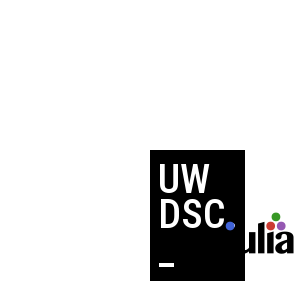

In [50]:
@png begin
    box(Point(0, 0), Point(95, 131), :fill)
    
    @layer begin
        translate(8, 43)
        sethue("white")
        dsclogo()
    end

    positionedjulialogo()
end 300 300

The black text cannot be read on a black background.

- Workaround: draw the Julia logo once in white (clipped to the black box), and once in black.
- Kind of a neat effect.

In [51]:
# Write the box coordinates and a function to draw a scaled julia logo once
boxcoords = (Point(0, 0), Point(95, 131))

(Point(0.0, 0.0), Point(95.0, 131.0))

In [52]:
@png begin
    box(boxcoords..., :fill)

    @layer begin
        sethue("white")
        translate(8, 43)
        dsclogo()
    end
    
    positionedjulialogo(bodycolor="black")

    box(boxcoords..., :clip)
    positionedjulialogo(bodycolor="white")
end 300 300

Finally, we can add in the remaining text elements for the poster. Also, we will size the drawing appropriately for letter-sized paper. (This will also fix the weird centering arising from our choice of origin in the coordinate system.)

- This size is provided through additional parameters to the `@svg` macro.

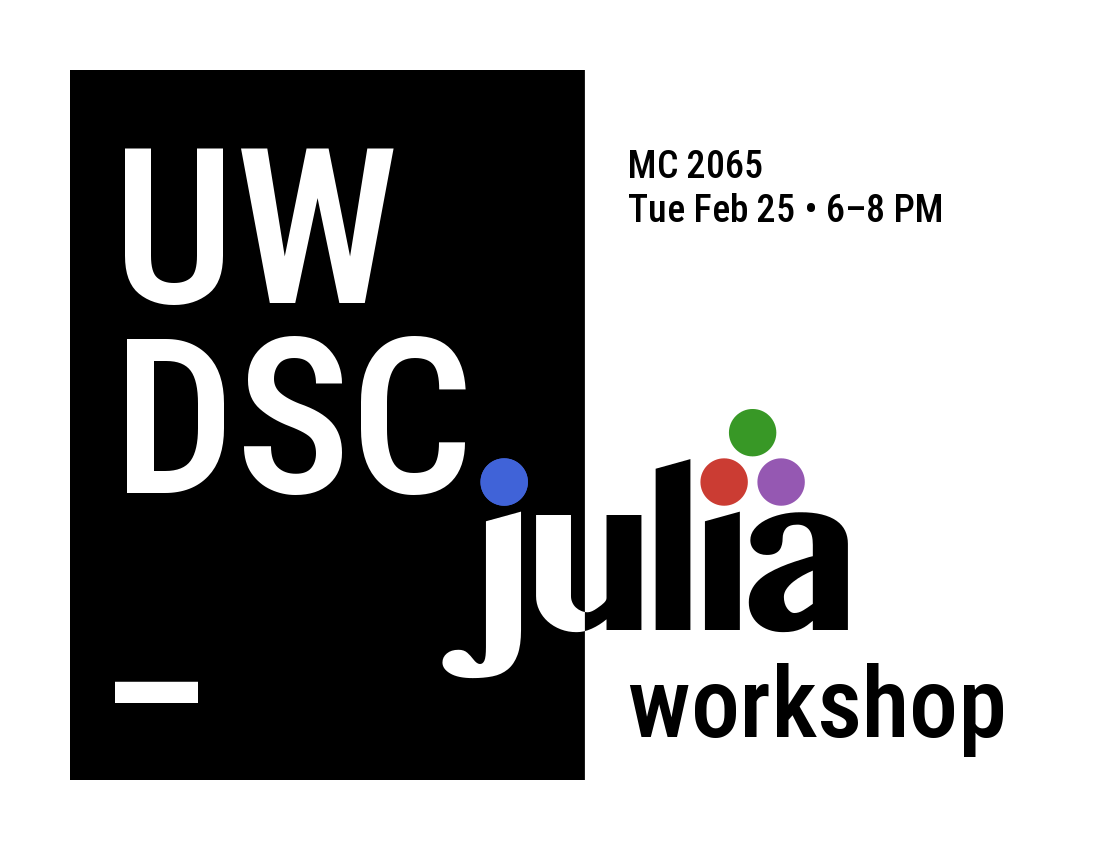

In [53]:
@png begin
    # set coordinates so (-70, -70) is top-left
    # and so boxcoords[2].y + 70 is bottom of page (to leave some margin)
    translate(-480, -355)
    scale(710 / boxcoords[2].y)
    box(boxcoords..., :fill)

    @layer begin
        sethue("white")
        translate(8, 43)
        dsclogo()
    end
    
    positionedjulialogo(bodycolor="black")

    sethue("red")
    box(boxcoords..., :clip)
    positionedjulialogo(bodycolor="white")
    clipreset()

    sethue("black")
    fontsize(18)
    text("workshop", Point(103, 123))
    
    fontsize(7)
    text("MC 2065", Point(103, 20))
    text("Tue Feb 25 • 6–8 PM", Point(103, 28))
end 1100 850

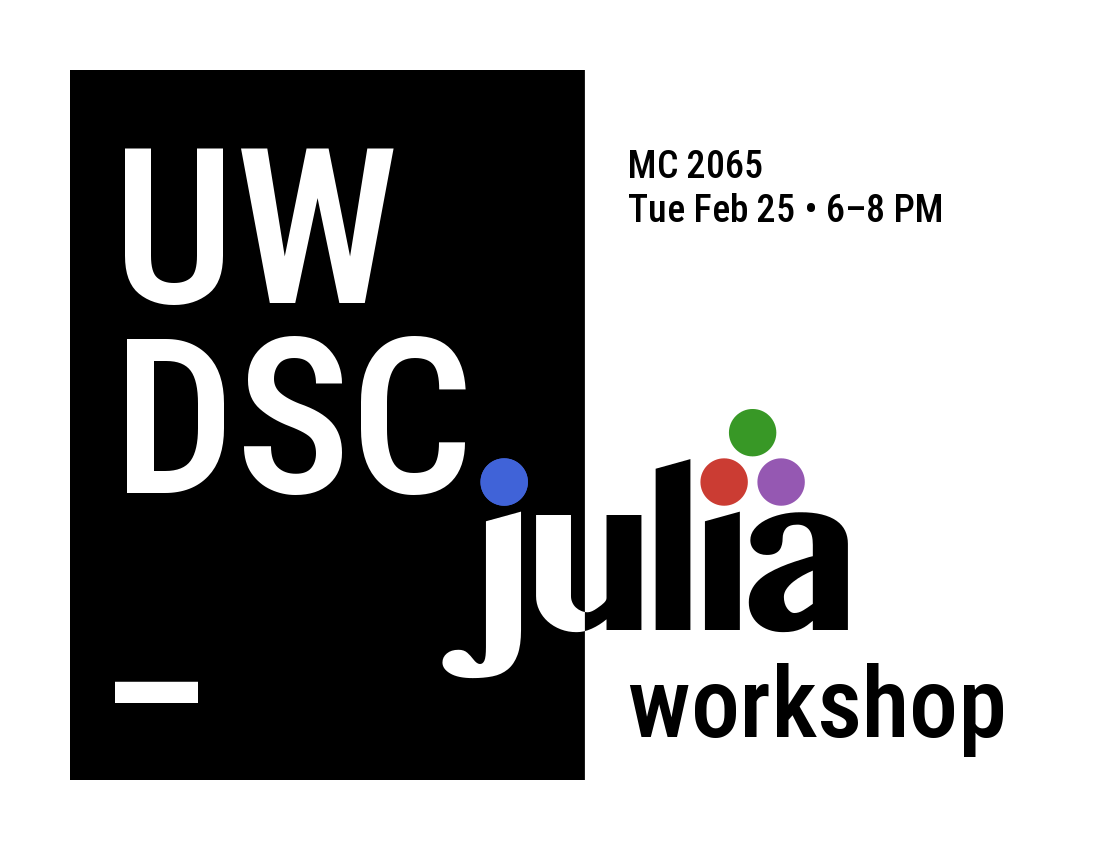

In [54]:
# since it is cut off on the previous slide...
preview()

## Some syntax

- Macros: e.g. `@png`, `@layer`.
  - Work like Scheme macros.
  - Essentially allows package authors to create syntax extensions.
- Symbols: `:fill`
  - Work like Scheme symbols.
  - They are essentially short strings that are *interned* (hashed so they only need a pointer-size of memory to pass around).
- Splat operator: `...`
  - May have seen in other languages: vararg, `*`/`**` in Python, etc.
  - Allows handling arbitrary number of arguments / keyword arguments as a single unit.

There are lots of small syntax things beyond the scope of this workshop. But the above are the most common across the ecosystem.

## Part 5: Julia for Programming and Data Science

Goal: run a tic tac toe AI tournament

Will need:

- types
- multimethods
- AI*

\* not machine learning, 😢

## Some notes before we begin

Many languages are object-oriented. Julia is not.

Philosophy: a type represents some semantic meaning to data. Instances of types are called objects. Objects do not generally contain functions / methods. Think of a type as a noun, e.g. `String`, `Int`, `Symbol`. User-defined types might be `Person` or `HTTPRequest` or `JavaScriptSyntaxTree`.

Functions are _verbs_ that act on objects. A function should generally be a semantic operation, like `+`, and thus might have multiple implementations depending on the representation of the objects. For example `1 * 1` is not the same mechanical operation for the computer as `A::Matrix{Int} * B::Vector{Int}`, but they are both methods of function `*`.

**Contrast** with object-oriented view: objects contain both data and methods that operate on this data.

In Julia objects contain just data (and some assigned meaning to it). Functions are not contained within objects; they are first-class concepts.

## A Plan

1. Make a representation for the tic-tac-toe board.
2. Make a interface for AIs to play tic-tac-toe.
3. Make some AIs.
4. Run a tournament.

At any step feel free to extend with your own ideas!

## Bitboard Representation

- Computers store numbers internally as binary (e.g. 1000110, which is 70 in decimal)
  - means that they are particularly efficient at operations like counting bits, bitwise and, bitwise or, etc.
- A **bitboard** is, essentially, a number whose binary representation encodes some feature of squares of a board
- Useful to save space and efficient for many operations

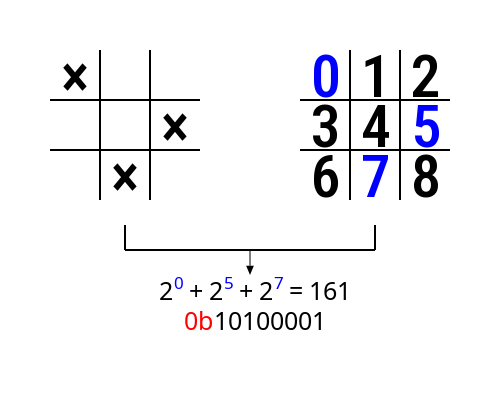

In [55]:
# visualization of what is going on in a bitboard
using Luxor

drawing = @png begin
    translate(0, 50)

    function tictactoeboard()
        for i = 1:2
            line(Point(50 * i, 0), Point(50 * i, 150), :stroke)
            line(Point(0, 50 * i), Point(150, 50 * i), :stroke)
        end
    end
    function glyph(i, c)
        @layer begin
            x = i % 3
            y = i ÷ 3
            fontface("Helvetica-Bold")
            fontsize(60)
            text(c, Point(x * 50 + 11, y * 50 + 47))
        end
    end

    xs = [0, 5, 7]
    @layer begin
        translate(-200, -200)
        tictactoeboard()
        for i = xs
            glyph(i, "×")
        end
    end
    @layer begin
        translate(50, -200)
        tictactoeboard()
        for i = 0:8
            @layer begin
                if i in xs
                    sethue("blue")
                end
                glyph(i, string(i))
            end
        end
    end
    line(Point(-125, -25), Point(-125, 0), :stroke)
    line(Point(-125, 0), Point(0, 0), :stroke)
    line(Point(125, -25), Point(125, 0), :stroke)
    line(Point(125, 0), Point(0, 0), :stroke)
    arrow(Point(0, 0), Point(0, 25))
    
    @layer begin
        translate(-length(xs) * 50 + 9, 50)
        fontface("Noto Sans")
        fontsize(25)
        for (ind, i) in enumerate(xs)
            @layer begin
                text("2", Point(ind * 50, 0))
                text(ind == length(xs) ? "=" : "+", Point(ind * 50 + 30, 0))
                fontsize(17)
                sethue("blue")
                text(string(i), Point(ind * 50 + 15, -11))
            end
        end
        text(string(sum(2 .^ xs)), Point(length(xs) * 50 + 50, 0))
        sethue("red")
        text("0b", Point(75, 30))
        sethue("black")
        text(string(sum(2 .^ xs), base=2), Point(105, 30))
    end
end 500 400

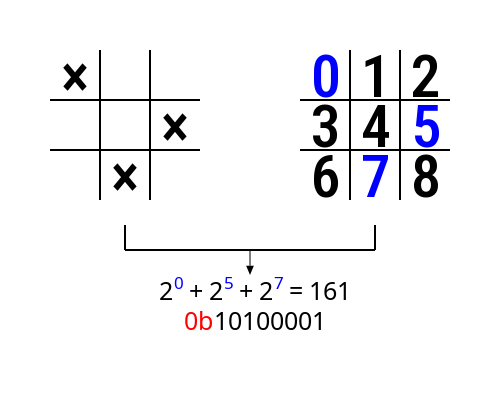

In [56]:
preview() # see notebook for code

We will use two bitboards, one for the X’s and one for the O’s.

- `UInt16` (unsigned integer 16) includes 16 bits, which is bigger than the 9 required
- We only have `UInt8`, `UInt16`, `UInt32`, `UInt64`, `UInt128` (powers of 2) so this is the best we can do

In [57]:
"""
A tic tac toe board.
"""
struct TicTacToe
    xs::UInt16
    os::UInt16

    TicTacToe() = new(0, 0)  # blank object

    # this constructor will error if the provided state is "invalid",
    # i.e. involves bits >= 10 or have overlap between xs and os.
    # our definition of invalid is a little lax:
    # we are fine with states that cannot occur in a real game,
    # as long as they can be displayed like a tic tac toe board.
    function TicTacToe(xs, os)
        xs = UInt16(xs)
        os = UInt16(os)
        if xs & 0b111111111 != xs
            throw(ArgumentError("xs contains invalid bits"))
        end
        if os & 0b111111111 != os
            throw(ArgumentError("os contains invalid bits"))
        end
        if xs & os != 0b000000000
            throw(ArgumentError("xs and os overlap"))
        end
        new(xs, os)
    end
end

TicTacToe

That is it for the type. All other functionality will be provided through functions.

- Provide a way to access the board without accessing fields xs and os (which for external code should be considered *private*)

In [58]:
import Base: getindex

"""
Return :X or :O if such a symbol is present in row i, column j (counting from 1), or :empty otherwise.
"""
function getindex(board::TicTacToe, i::Integer, j::Integer)
    if i < 1 || i > 3 || j < 1 || j > 3
        throw(BoundsError(board, (i, j)))
    end
    bit = 3(i - 1) + (j - 1)
    if board.xs & (1 << bit) != 0
        :X
    elseif board.os & (1 << bit) != 0
        :O
    else
        :empty
    end
end

Base.getindex

A simple test...

In [59]:
using Test  # standard library
board = TicTacToe(0b0010100001, 0)
@testset "board with Xs at (1,1), (2,3) and (3,2)" begin
    @test board[1, 1] == :X
    @test board[1, 2] == :empty
    @test board[1, 3] == :empty
    @test board[2, 1] == :empty
    @test board[2, 2] == :empty
    @test board[2, 3] == :X
    @test board[3, 1] == :empty
    @test board[3, 2] == :X
    @test board[3, 3] == :empty
    @test_throws BoundsError board[4, 2]
end;

Test Summary:                           | Pass  Total
board with Xs at (1,1), (2,3) and (3,2) |   10     10


- Provide a readable way to display the board

In [60]:
import Base: show

function show(io::IO, ::MIME"text/plain", board::TicTacToe)
    for row in 1:3
        for column in 1:3
            entry = board[row, column]
            if entry == :empty
                print(io, " ")
            else
                print(io, entry)
            end
            if column < 3
                print(io, "┃")
            end
        end
        println(io)
        if row < 3
            println(io, "━╋━╋━")
        end
    end
end

TicTacToe(0b0010100001, 0)

X┃ ┃ 
━╋━╋━
 ┃ ┃X
━╋━╋━
 ┃X┃ 


Now some basic rules...

- `count_xs()`: number of X
- `count_os()`: number of O
- helper function `haswon(::UInt16)`: check if there is three in a row on individual bitboard

Note: generating constants at the top level is pretty common in Julia (if you make your code a package, the top-level is precompiled, so the generation code only happens once \[per package update\])

Lots of packages rely on this.

In [61]:
count_xs(board::TicTacToe) = count_ones(board.xs)
count_os(board::TicTacToe) = count_ones(board.os)

const all_winning_patterns = UInt16[]
for i = 0:2
    push!(all_winning_patterns, sum(2 .^ (3i:3i+2)))  # row i+1
    push!(all_winning_patterns, sum(2 .^ (i:3:6+i)))  # column i+1
end
push!(all_winning_patterns, sum(2 .^ (0:4:8)))  # diagonal \
push!(all_winning_patterns, sum(2 .^ (2:2:6)))  # diagonal /

haswon(bb::UInt16) =
    any(bb & pattern == pattern
        for pattern in all_winning_patterns)

haswon (generic function with 1 method)

In [62]:
# check: winning patterns are what we expect
for pattern in all_winning_patterns
    display(TicTacToe(pattern, 0))
end

X┃X┃X
━╋━╋━
 ┃ ┃ 
━╋━╋━
 ┃ ┃ 


X┃ ┃ 
━╋━╋━
X┃ ┃ 
━╋━╋━
X┃ ┃ 


 ┃ ┃ 
━╋━╋━
X┃X┃X
━╋━╋━
 ┃ ┃ 


 ┃X┃ 
━╋━╋━
 ┃X┃ 
━╋━╋━
 ┃X┃ 


 ┃ ┃ 
━╋━╋━
 ┃ ┃ 
━╋━╋━
X┃X┃X


 ┃ ┃X
━╋━╋━
 ┃ ┃X
━╋━╋━
 ┃ ┃X


X┃ ┃ 
━╋━╋━
 ┃X┃ 
━╋━╋━
 ┃ ┃X


 ┃ ┃X
━╋━╋━
 ┃X┃ 
━╋━╋━
X┃ ┃ 


continued...

- `status()`: `:X_wins`, `:O_wins`, `:Draw`, `:X_to_move`, `:O_to_move` or `:Invalid`
- `isresolved()`: true or false (game is valid and done)
- `xscore()`: 1, 0, 0.5, or error

In [63]:
function status(board::TicTacToe)
    xs = count_xs(board)
    os = count_os(board)
    xwon = haswon(board.xs)
    owon = haswon(board.os)
    
    if xwon && owon || xs < os || xs > os + 1
        :Invalid
    elseif xwon
        :X_wins
    elseif owon
        :O_wins
    elseif xs == 5 && os == 4
        :Draw
    elseif xs > os
        :O_to_move
    else
        @assert xs == os
        :X_to_move
    end
end

isresolved(board::TicTacToe) = status(board) in (:X_wins, :O_wins)

const XSCOREMAP = Dict(:X_wins => 1.0, :O_wins => 0.0, :Draw => 0.5)
xscore(board::TicTacToe) = XSCOREMAP[status(board)]

xscore (generic function with 1 method)

continued...

- `moves()`: return vector of (row, column) pairs representing legal moves

In [64]:
function moves(board::TicTacToe)
    st = status(board)
    if !(st in (:X_to_move, :O_to_move))
        throw(ArgumentError("provided board is invalid or complete"))
    else
        [(i, j) for i = 1:3 for j = 1:3 if board[i, j] == :empty]
    end
end
                
@test Set(moves(TicTacToe(0, 0))) == Set(Iterators.product(1:3, 1:3))

Test Passed

continued...

- `play(board, row, column)`: return new board playing at (row, column) if allowed, error otherwise

In [65]:
function play(board::TicTacToe, row::Integer, column::Integer)
    st = status(board)
    bit = 1 << (3(row - 1) + column - 1)
    if board[row, column] == :empty
        if st == :X_to_move
            TicTacToe(bit | board.xs, board.os)
        elseif st == :O_to_move
            TicTacToe(board.xs, bit | board.os)
        else
            throw(ArgumentError("provided board is invalid or complete"))
        end
    else
        throw(ArgumentError("not a legal move"))
    end
end

play (generic function with 1 method)

In [66]:
board = TicTacToe()
board = play(board, 2, 2)

 ┃ ┃ 
━╋━╋━
 ┃X┃ 
━╋━╋━
 ┃ ┃ 


In [67]:
board = play(board, 1, 1)

O┃ ┃ 
━╋━╋━
 ┃X┃ 
━╋━╋━
 ┃ ┃ 


Now we are ready to make some AIs. First we will define an interface and write a controller to pit two AIs against each other.

In [68]:
"""
An AI player for tic tac toe.

AI players should implement:

    selectmove(p::Player, board::Board) :: Tuple{Int, Int}

which outputs the row and column of the selected move.
"""
abstract type AIPlayer end

function vs(x::AIPlayer, o::AIPlayer)
    board = TicTacToe()
    st = status(board)
    while st in (:X_to_move, :O_to_move)
        player = st == :X_to_move ? x : o
        board = play(board, selectmove(player, board)...)
        st = status(board)
    end
    board, st
end

vs (generic function with 1 method)

Next test it with a fully random AI:

In [69]:
struct RandomPlayer <: AIPlayer end
selectmove(::RandomPlayer, board::TicTacToe) = rand(moves(board))

finalboard, st = vs(RandomPlayer(), RandomPlayer())
finalboard

X┃X┃O
━╋━╋━
O┃X┃O
━╋━╋━
X┃O┃X


In [70]:
st

:X_wins

Exercise: Write an AI that picks the first move (in the order generated by `moves`). Hint: use the `first` function.

In [71]:
struct LeftmostTopmostPlayer <: AIPlayer end
selectmove(::LeftmostTopmostPlayer, board::TicTacToe) = first(moves(board))

finalboard, st = vs(LeftmostTopmostPlayer(), LeftmostTopmostPlayer())
finalboard

X┃O┃X
━╋━╋━
O┃X┃O
━╋━╋━
X┃ ┃ 


In [72]:
st

:X_wins

Next: Write a game-theoretically optimal AI.

Hint: Remember what we did with the math problem earlier... we can do something very similar here.

First write a function to calculate the game-theoretic score, which is 1 if X can force a win, 0 if O can force a win, and 0.5 otherwise.

In [73]:
using Memoize

@memoize function gtscore(board::TicTacToe)
    st = status(board)
    if st == :X_wins
        1.0
    elseif st == :O_wins
        0.0
    elseif st == :Draw
        0.5
    elseif st == :X_to_move
        maximum(gtscore(play(board, move...)) for move in moves(board))
    elseif st == :O_to_move
        minimum(gtscore(play(board, move...)) for move in moves(board))
    else
        throw(ArgumentError("invalid position"))
    end
end

@test gtscore(TicTacToe()) == 0.5

Test Passed

Now relatively easy to write a GTO player.

- We can also write a bad player that tries its best to lose.
- (Not the same as an optimally bad player, because `gtscore` assumes perfect good play.)

In [74]:
struct GTOPlayer <: AIPlayer
    selectworst::Bool
end

function selectmove(g::GTOPlayer, board::TicTacToe)
    st = status(board)
    @assert st in (:X_to_move, :O_to_move)
    # selectworst (exclusive) OR playing O, then minimize score
    # if both, or neither, then maximize score
    argextremum = xor(g.selectworst, st == :O_to_move) ? argmin : argmax
    candidates = moves(board)
    ind = argextremum([gtscore(play(board, move...)) for move in candidates])
    candidates[ind]
end

finalboard, st = vs(GTOPlayer(false), GTOPlayer(true))
finalboard

X┃O┃O
━╋━╋━
X┃X┃O
━╋━╋━
X┃ ┃ 


In [75]:
st

:X_wins

How good relatively are the AIs?

- We can look at average score over some number of simulations of each pairing.
- X has an advantage, so we want to consider average score of the ordered pairs.
- Prefer to display this information as a table.

Idea: Use `DataFrames` package for nicely formatted tables.

In [76]:
using Pkg
Pkg.add("DataFrames")

  Resolving package versions...
   Updating `~/.julia/environments/v1.5/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.5/Manifest.toml`
 [no changes]


In [77]:
using DataFrames

players = [
    "random" => RandomPlayer(),
    "leftmost-topmost" => LeftmostTopmostPlayer(),
    "gto" => GTOPlayer(false),
    "bad-gto" => GTOPlayer(true),
]

games = DataFrame(xplayer = String[], oplayer = String[], result = Float64[])
for (xname, xplayer) in players
    for (oname, oplayer) in players
        for i = 1:10000
            board, _ = vs(xplayer, oplayer)
            push!(games, (xname, oname, xscore(board)))
        end
    end
end

In [78]:
games

160000×3 DataFrame
│ Row    │ xplayer │ oplayer │ result  │
│        │ String  │ String  │ Float64 │
├────────┼─────────┼─────────┼─────────┤
│ 1      │ random  │ random  │ 1.0     │
│ 2      │ random  │ random  │ 1.0     │
│ 3      │ random  │ random  │ 1.0     │
│ 4      │ random  │ random  │ 1.0     │
│ 5      │ random  │ random  │ 0.0     │
│ 6      │ random  │ random  │ 1.0     │
│ 7      │ random  │ random  │ 1.0     │
│ 8      │ random  │ random  │ 1.0     │
│ 9      │ random  │ random  │ 1.0     │
│ 10     │ random  │ random  │ 0.0     │
⋮
│ 159990 │ bad-gto │ bad-gto │ 1.0     │
│ 159991 │ bad-gto │ bad-gto │ 1.0     │
│ 159992 │ bad-gto │ bad-gto │ 1.0     │
│ 159993 │ bad-gto │ bad-gto │ 1.0     │
│ 159994 │ bad-gto │ bad-gto │ 1.0     │
│ 159995 │ bad-gto │ bad-gto │ 1.0     │
│ 159996 │ bad-gto │ bad-gto │ 1.0     │
│ 159997 │ bad-gto │ bad-gto │ 1.0     │
│ 159998 │ bad-gto │ bad-gto │ 1.0     │
│ 159999 │ bad-gto │ bad-gto │ 1.0     │
│ 160000 │ bad-gto │ bad-gto │ 1.0     │

In [79]:
using Statistics  # standard library

aggregate(games, [:xplayer, :oplayer], mean)

16×3 DataFrame
│ Row │ xplayer          │ oplayer          │ result_mean │
│     │ String           │ String           │ Float64     │
├─────┼──────────────────┼──────────────────┼─────────────┤
│ 1   │ random           │ random           │ 0.6559      │
│ 2   │ random           │ leftmost-topmost │ 0.5342      │
│ 3   │ random           │ gto              │ 0.09715     │
│ 4   │ random           │ bad-gto          │ 0.9146      │
│ 5   │ leftmost-topmost │ random           │ 0.80455     │
│ 6   │ leftmost-topmost │ leftmost-topmost │ 1.0         │
│ 7   │ leftmost-topmost │ gto              │ 0.0         │
│ 8   │ leftmost-topmost │ bad-gto          │ 1.0         │
│ 9   │ gto              │ random           │ 0.99825     │
│ 10  │ gto              │ leftmost-topmost │ 1.0         │
│ 11  │ gto              │ gto              │ 0.5         │
│ 12  │ gto              │ bad-gto          │ 1.0         │
│ 13  │ bad-gto          │ random           │ 0.33055     │
│ 14  │ bad-gto          │ leftmost-topmost │ 0.0         │
│ 15  │ bad-gto          │ gto              │ 0.0         │
│ 16  │ bad-gto          │ bad-gto          │ 1.0         │

In [80]:
unstack(ans, :xplayer, :oplayer, :result_mean)

4×5 DataFrame
│ Row │ xplayer          │ bad-gto  │ gto      │ leftmost-topmost │ random   │
│     │ String           │ Float64⍰ │ Float64⍰ │ Float64⍰         │ Float64⍰ │
├─────┼──────────────────┼──────────┼──────────┼──────────────────┼──────────┤
│ 1   │ bad-gto          │ 1.0      │ 0.0      │ 0.0              │ 0.33055  │
│ 2   │ gto              │ 1.0      │ 0.5      │ 1.0              │ 0.99825  │
│ 3   │ leftmost-topmost │ 1.0      │ 0.0      │ 1.0              │ 0.80455  │
│ 4   │ random           │ 0.9146   │ 0.09715  │ 0.5342           │ 0.6559   │

## Exercise

Write a bot that plays in the first of the following list of squares that is available: `[(2, 2), (1, 1), (3, 3), (1, 3), (3, 1), (1, 2), (3, 2), (2, 1), (3, 2)]`, i.e. this bot does not actually look at the board at all but just tries to occupy the most important squares early.

- Hint: look at help for the `intersect` function, which makes this a breeze
- In my experience this bot does surprisingly well against random, even though it is essentially blind.
- Is there a better order (for exploiting random)? I have not tried, but $9! = 362880$ can be brute forced.

## More exercises (not in slideshow)

1. Write a misère GTO player, i.e. a player that tries to minimize the score against best (also trying to lose) opposition optimally.
  - This is not the same as `bad-gto`, which assumes opposition will try to win.
2. Write an exploitative AI that has the best possible average score against the random player.
  - Hint: modify `gtscore` logic so that the opponent is assumed to pick a random move, instead of picking the best move
  - i.e. calculate expected value instead of minimum (if we are X) or instead of maximum (if we are O)
3. Write a general exploitative AI that optimizes for win rate against a specific player through simulating some number of responses from that player (you can take the AI player being exploited as a parameter)
  - Hint: you can `@memoize` the `selectmove` function so that it will be less slow to add this to your tournament

In [81]:
# Here is a solution to 4.

struct PrioritySquarePlayer <: AIPlayer
    priorities::Vector{Tuple{Int, Int}}
end
# default
PrioritySquarePlayer() = PrioritySquarePlayer(
    [(2, 2), (1, 1), (3, 3), (1, 3), (3, 1), (1, 2), (3, 2), (2, 1), (2, 3)]
)
selectmove(p::PrioritySquarePlayer, board::TicTacToe) = first(intersect(p.priorities, moves(board)))

selectmove (generic function with 4 methods)

## Further Reading

- Jeff (one of Julia co-authors) wrote his PhD thesis on the Julia type system. It is not 100% up to date, but the foundations and exposition are still relevant. (Warning: kind of technical) https://github.com/JeffBezanson/phdthesis/blob/master/main.pdf
- Multimethods vs. function overloading: what is the difference? Excellent and brief Discourse post by Joshua Ballanco: https://discourse.julialang.org/t/is-multiple-dispatch-the-same-as-function-overloading/4145/5
- \[Little out of date as I wrote it for a pre-1.0 version of Julia, but I am happy to update it if anyone wants to run it on Julia 1.0+\] my notebook on taking derivatives (good application of multimethods): https://wafy.me/documents/multdisp.html